In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

In [2]:
dir_path = 'pool'
files = os.listdir(dir_path)
#files

In [3]:
def update_dict(dict_ranking, ticker):
    if ticker in dict_ranking:
        dict_ranking[ticker] += 1
    else:
        dict_ranking[ticker] = 1

In [16]:
def sort_dict_by_value(dic):
    list_key_value = sorted(dic.items(), key=lambda x:x[1], reverse=True)
    dic_new = dict()
    for set0 in list_key_value:
        key = set0[0]
        value = set0[1]
        dic_new[key] = value
    return dic_new

# 三菱ＵＦＪフィナンシャル・グループ (8306)

In [4]:
import re

pattern = re.compile(r'corr_8306-\d+\.pkl')
pkl_8306 = list()
for file in files:
    m = pattern.match(file)
    if m:
        pkl_8306.append(file)
print(pkl_8306)

['corr_8306-1705017600.pkl', 'corr_8306-1705276800.pkl', 'corr_8306-1705363200.pkl', 'corr_8306-1705449600.pkl', 'corr_8306-1705536000.pkl', 'corr_8306-1705622400.pkl', 'corr_8306-1705881600.pkl', 'corr_8306-1705968000.pkl', 'corr_8306-1706054400.pkl', 'corr_8306-1706140800.pkl', 'corr_8306-1706227200.pkl', 'corr_8306-1706486400.pkl', 'corr_8306-1706572800.pkl', 'corr_8306-1706659200.pkl', 'corr_8306-1706745600.pkl', 'corr_8306-1706832000.pkl', 'corr_8306-1707091200.pkl', 'corr_8306-1707177600.pkl', 'corr_8306-1707264000.pkl', 'corr_8306-1707350400.pkl', 'corr_8306-1707436800.pkl', 'corr_8306-1707696000.pkl', 'corr_8306-1707782400.pkl', 'corr_8306-1707868800.pkl', 'corr_8306-1707955200.pkl', 'corr_8306-1708041600.pkl', 'corr_8306-1708300800.pkl', 'corr_8306-1708387200.pkl', 'corr_8306-1708473600.pkl', 'corr_8306-1708560000.pkl', 'corr_8306-1708646400.pkl', 'corr_8306-1708905600.pkl', 'corr_8306-1708992000.pkl', 'corr_8306-1709078400.pkl', 'corr_8306-1709164800.pkl', 'corr_8306-17092512

In [39]:
import pandas as pd

dict_ranking_1_8306 = dict()
dict_ranking_2_8306 = dict()
dict_ranking_3_8306 = dict()

for pkl in pkl_8306:
    file = os.path.join(dir_path, pkl)    
    df_result = pd.read_pickle(file)

    ticker_1 = df_result.index[0]
    update_dict(dict_ranking_1_8306, ticker_1)

    ticker_2 = df_result.index[1]
    update_dict(dict_ranking_2_8306, ticker_2)

    ticker_3 = df_result.index[2]
    update_dict(dict_ranking_3_8306, ticker_3)

dict_ranking_1_8306 = sort_dict_by_value(dict_ranking_1_8306)
dict_ranking_2_8306 = sort_dict_by_value(dict_ranking_2_8306)
dict_ranking_3_8306 = sort_dict_by_value(dict_ranking_3_8306)

print(1, dict_ranking_1_8306)
print(2, dict_ranking_2_8306)
print(3, dict_ranking_3_8306)

1 {'4922': 30, '3186': 15, '6411': 13, '3856': 11, '2590': 7, '6030': 1}
2 {'9058': 22, '6030': 16, '4575': 14, '6548': 7, '3856': 7, '6411': 4, '5867': 3, '4442': 3, '2590': 1}
3 {'4575': 21, '3856': 11, '9058': 10, '6411': 7, '5867': 6, '2998': 5, '8165': 5, '6548': 4, '6030': 4, '3186': 1, '2999': 1, '4922': 1, '4442': 1}


In [55]:
ticker_1 = list(dict_ranking_1_8306.keys())[0]
ticker_2 = list(dict_ranking_1_8306.keys())[1]
ticker_3 = list(dict_ranking_1_8306.keys())[2]

list_ts = list()
list_corr_1 = list()
list_corr_2 = list()
list_corr_3 = list()

pattern = re.compile(r'corr_\d{4}-(\d+)\.pkl')

#pkl = 'corr_8306-1705017600.pkl'
for pkl in pkl_8306:
    m = pattern.match(pkl)
    if m:
        ts = m.group(1)
    else:
        ts = 0
    list_ts.append(int(ts))
    
    file = os.path.join(dir_path, pkl)
    df_result = pd.read_pickle(file)
    list_corr_1.append(df_result.loc[ticker_1].iloc[0])
    list_corr_2.append(df_result.loc[ticker_2].iloc[0])
    list_corr_3.append(df_result.loc[ticker_3].iloc[0])

df_corr_8306 = pd.DataFrame({ticker_1: list_corr_1,
                             ticker_2: list_corr_2,
                             ticker_3: list_corr_3,},
                            index=list_ts)
df_corr_8306

,4922,3186,6411
1705017600,-0.745557,-0.875346,0.675719
1705276800,-0.739299,-0.871457,0.657290
1705363200,-0.732312,-0.867232,0.640240
1705449600,-0.725269,-0.862090,0.617209
1705536000,-0.718347,-0.855586,0.590854
...,...,...,...
1713830400,-0.954472,0.562118,-0.926815
1713916800,-0.954859,0.564673,-0.926546
1714003200,-0.955049,0.567043,-0.926819
1714089600,-0.955475,0.573941,-0.926640


In [59]:
pd.to_datetime(list_ts)

DatetimeIndex(['1970-01-01 00:00:01.705017600',
               '1970-01-01 00:00:01.705276800',
               '1970-01-01 00:00:01.705363200',
               '1970-01-01 00:00:01.705449600',
                  '1970-01-01 00:00:01.705536',
               '1970-01-01 00:00:01.705622400',
               '1970-01-01 00:00:01.705881600',
                  '1970-01-01 00:00:01.705968',
               '1970-01-01 00:00:01.706054400',
               '1970-01-01 00:00:01.706140800',
               '1970-01-01 00:00:01.706227200',
               '1970-01-01 00:00:01.706486400',
               '1970-01-01 00:00:01.706572800',
               '1970-01-01 00:00:01.706659200',
               '1970-01-01 00:00:01.706745600',
                  '1970-01-01 00:00:01.706832',
               '1970-01-01 00:00:01.707091200',
               '1970-01-01 00:00:01.707177600',
                  '1970-01-01 00:00:01.707264',
               '1970-01-01 00:00:01.707350400',
               '1970-01-01 00:00:01.7074

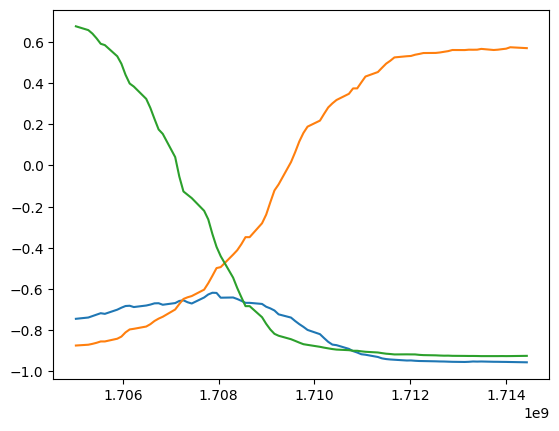

In [60]:
import matplotlib.pyplot as plt

plt.plot(df_corr_8306[ticker_1])
plt.plot(df_corr_8306[ticker_2])
plt.plot(df_corr_8306[ticker_3])
plt.show()

# 東京エレクトロン (8035)

In [18]:
import re

pattern = re.compile(r'corr_8035-\d+\.pkl')
pkl_8035 = list()
for file in files:
    m = pattern.match(file)
    if m:
        pkl_8035.append(file)
print(pkl_8035)

['corr_8035-1705017600.pkl', 'corr_8035-1705276800.pkl', 'corr_8035-1705363200.pkl', 'corr_8035-1705449600.pkl', 'corr_8035-1705536000.pkl', 'corr_8035-1705622400.pkl', 'corr_8035-1705881600.pkl', 'corr_8035-1705968000.pkl', 'corr_8035-1706054400.pkl', 'corr_8035-1706140800.pkl', 'corr_8035-1706227200.pkl', 'corr_8035-1706486400.pkl', 'corr_8035-1706572800.pkl', 'corr_8035-1706659200.pkl', 'corr_8035-1706745600.pkl', 'corr_8035-1706832000.pkl', 'corr_8035-1707091200.pkl', 'corr_8035-1707177600.pkl', 'corr_8035-1707264000.pkl', 'corr_8035-1707350400.pkl', 'corr_8035-1707436800.pkl', 'corr_8035-1707696000.pkl', 'corr_8035-1707782400.pkl', 'corr_8035-1707868800.pkl', 'corr_8035-1707955200.pkl', 'corr_8035-1708041600.pkl', 'corr_8035-1708300800.pkl', 'corr_8035-1708387200.pkl', 'corr_8035-1708473600.pkl', 'corr_8035-1708560000.pkl', 'corr_8035-1708646400.pkl', 'corr_8035-1708905600.pkl', 'corr_8035-1708992000.pkl', 'corr_8035-1709078400.pkl', 'corr_8035-1709164800.pkl', 'corr_8035-17092512

In [19]:
import pandas as pd

dict_ranking_1_8035 = dict()
dict_ranking_2_8035 = dict()
dict_ranking_3_8035 = dict()

for pkl in pkl_8035:
    file = os.path.join(dir_path, pkl)
    df_result = pd.read_pickle(file)

    ticker_1 = df_result.index[0]
    update_dict(dict_ranking_1_8035, ticker_1)

    ticker_2 = df_result.index[1]
    update_dict(dict_ranking_2_8035, ticker_2)

    ticker_3 = df_result.index[2]
    update_dict(dict_ranking_3_8035, ticker_3)

dict_ranking_1_8035 = sort_dict_by_value(dict_ranking_1_8035)
dict_ranking_2_8035 = sort_dict_by_value(dict_ranking_2_8035)
dict_ranking_3_8035 = sort_dict_by_value(dict_ranking_3_8035)

print(1, dict_ranking_1_8035)
print(2, dict_ranking_2_8035)
print(3, dict_ranking_3_8035)

1 {'4833': 42, '3070': 16, '4985': 11, '4098': 7, '6775': 1}
2 {'7089': 24, '4678': 11, '4196': 11, '4985': 9, '4575': 7, '4098': 4, '4784': 4, '6775': 2, '3070': 1, '4263': 1, '4833': 1, '6573': 1, '4922': 1}
3 {'7140': 9, '8925': 8, '4098': 7, '2586': 6, '4985': 6, '7707': 5, '4196': 5, '7089': 5, '6775': 4, '4575': 4, '4678': 3, '3814': 3, '6573': 3, '7771': 2, '4833': 2, '6571': 2, '3070': 1, '4784': 1, '4263': 1}
